Overall Summary:

Part 1: Import progams and data
Part 2: Explore data
Part 3: Data Cleaning and combine both data sets
Part 4: Train a logistic regression model

1 Import programs and data

1.1 Import needed programs (add on the fly everything needed)

1.2 Import the csv files (dfc = cient_train.csv , dfi = invoice_train.csv)

In [2]:
# 1.1 Import needed programs (add on the fly everything needed)
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1.2 Import the csv files
dfc = pd.read_csv("data/train/client_train.csv")
dfi = pd.read_csv("data/train/invoice_train.csv")

2 Take a look at the data - what needs to be cleaned?


2.1.1 Head of client train

2.1.2 Shape of client train (135493, 6)

2.1.3 Description of client train

2.1.4 Info on client train (135.493 entries, all of 5 columns have zero non-null entries)



2.2.1 Head of invoice client

2.2.2 Shape of invoice client (4476749, 16)

2.2.3 Description of invoice client

2.2.4 Info on invoice client (4.476.749 entries, all of 15 columns have zero non-null entries)

2.2.5 Check for null values as they do not appear in the info (no nulls in any column)


2.0 Variable definitions

From webpage:

Variable definitions

Client:

Client_id: Unique id for client

District: District where the client is

Client_catg: Category client belongs to

Region: Area where the client is

Creation_date: Date client joined

Target: fraud:1 , not fraud: 0

Invoice data

Client_id: Unique id for the client

Invoice_date: Date of the invoice

Tarif_type: Type of tax

Counter_number:

Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect

Counter_code:

Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something 
wrong, the agent gives a bad score)

Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded

Consommation_level_1: Consumption_level_1

Consommation_level_2: Consumption_level_2

Consommation_level_3: Consumption_level_3

Consommation_level_4: Consumption_level_4

Old_index: Old index

New_index: New index

Months_number: Month number

Counter_type: Type of counter

In [54]:
# 2.1.1 Head of client train
dfc.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [55]:
# 2.1.2 Shape of client train (135493, 6)
dfc.shape

(135493, 6)

In [56]:
# 2.1.3 Description of client train
dfc.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [57]:
# 2.1.4 Info on client train (135.493 entries, all of 5 columns have zero non-null entries)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [58]:
# 2.2.1 Head of invoice client
dfi.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [59]:
# 2.2.2 Shape of invoice client (4476749, 16)
dfi.shape

(4476749, 16)

In [60]:
# 2.2.3 Description of invoice client
dfi.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [61]:
# 2.2.4 Info on invoice client (4.476.749 entries, all of 15 columns have zero non-null entries)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [62]:
# 2.2.5 Check for null values as they do not appear in the info (no nulls in any column)
dfi.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

Spring cleaning!

3.1 Start cleaning - Change the for date columns to datetime datatime

3.1.2 Combine both datasets into one (called dfw)


In [4]:
# 3.1 Start cleaning - Change the for date columns to datetime datatime
dfi['invoice_date'] = pd.to_datetime(dfi['invoice_date'])
dfc['creation_date'] = pd.to_datetime(dfc['creation_date'])

In [5]:
# 3.1.2 Combine both datasets into one (called dfw)

dfw = pd.merge(dfc, dfi, on = 'client_id', how = 'inner')

In [65]:
dfw['client_id']

0              train_Client_0
1              train_Client_0
2              train_Client_0
3              train_Client_0
4              train_Client_0
                  ...        
4476744    train_Client_99998
4476745    train_Client_99998
4476746    train_Client_99999
4476747    train_Client_99999
4476748    train_Client_99999
Name: client_id, Length: 4476749, dtype: object

In [6]:
# 3.1.3 remove the strings from the client id column and turn it into an integer

dfw['client_id'] =  dfw['client_id'].replace('train_Client_', '', regex=True)

In [67]:
dfw['client_id']

0              0
1              0
2              0
3              0
4              0
           ...  
4476744    99998
4476745    99998
4476746    99999
4476747    99999
4476748    99999
Name: client_id, Length: 4476749, dtype: object

For tomorrow: 

1) Split data

2) Deciding on a baseline model

3) write the code for a baseline model






* Classification problem
* Logistic regression

np.zero fraud 

4 Create a logistic regression model



Several options were chosen here:

4.3 Create model with unscaled data

4.4 Create model with scaled data

4.5 First a correlation heatmap was created, then only relevant features were chosen

4.6 The imbalance of the data was adressed by shrinking the dataset with target 0 (suggestion from Stack is also to weigth the classes https://stats.stackexchange.com/questions/6067/does-an-unbalanced-sample-matter-when-doing-logistic-regression) ( Also interesting about imbalanced datasets: https://www3.nd.edu/~rwilliam/stats3/rareevents.pdf)

4.7 The imbalance is adressed by correcting for rare events (King and Zeng 2001 https://gking.harvard.edu/files/0s.pdf)

4.8  Combine sampling up and down (Noa) creating synthetatic data (smote). for upsampling: uses a technique for numerical feature. be careful which type of feature is this

"&nbsp"

4.0 Import necessary packages

    Define features (X) and target (y)

4.1 Data Split

4.2 Normalize the data (will be used later)

4.3 Create Logistic regression model with unscaled data

    4.3.1 Print the coefficients and the intercept

    4.3.2 Predict using the test data

    4.3.3 Create Confusion matrix (TN:1030879, TP:0 , FN: 8309, FP:0). This is really not a good model or there is an error in this.

        Recall:0 Precision:0 Accuracy:0.921

    4.3.4 Predict the probabilities of the values belonging to one class (This is barely better than 0.5)
    


4.4 Create Logistic regression model with the scaled data

    4.4.1 Get again coefficients and the intercept

    4.4.2 Predict the target with the scaled data

    4.4.2 Predict the target with the scaled data

    4.4.3 Create confusion matrix with the scaled data (TN:1030858, TP:9 , FN: 88300, FP:21) This looks better with the scaled data.

        Recall: 0.00010 Precision: 0,3  Accuracy:0.921

    4.4.4 Predict the probabilities of the values belonging to one class (Probabilites of belonging to class 1 are very high)


4.5.6 Create confusion matrix with the subset scaled data (This is still really bad, same values as the unscaled data)
    



In [68]:
# 4.0 Import necessary packages

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [69]:
# Define features (X) and target (y)

X = dfw.drop(['target','creation_date','invoice_date','counter_statue', 'counter_type'], axis = 1)
y = dfw['target']

In [108]:
# 4.1 Data Split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [109]:
# 4.2 Normalize the data (will be used later)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Okay, going on with the logistic regression with the unscaled data




In [73]:
# 4.3 Create Logistic regression model with unscaled data
# store the Logicistic Regression in lr and fit the model to the training data

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [74]:
# 4.3.1 Print the coefficients and the intercept

print(lr1.coef_)
print(lr1.intercept_)

[[-6.06059811e-22 -6.49571159e-19 -1.11499059e-22 -1.99934762e-21
  -1.91805772e-22 -7.52336070e-14 -1.64957345e-21 -6.99529538e-23
  -9.60134666e-24 -3.90794057e-21 -9.86762610e-22 -1.70347594e-22
  -4.31237186e-22 -1.63669663e-19 -1.68980177e-19 -3.11507847e-22]]
[-9.56579643e-24]


In [75]:
# 4.3.2 Predict using the test data
y_pred = lr1.predict(X_test)

In [76]:
# 4.3.3 Create Confusion matrix (TN:1030879, TP:0 , FN: 8309, FP:0). This is really not a good model or there is an error in this.
# Recall:0 Precision:0 Accuracy:0.921
confusion_matrix(y_test, y_pred)

array([[1030879,       0],
       [  88309,       0]])

In [77]:
# 4.3.4 Predict the probabilities of the values belonging to one class (This is barely better than 0.5)

lr1.predict_proba(X_test)

array([[0.50000001, 0.49999999],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       ...,
       [0.5       , 0.5       ],
       [0.50000001, 0.49999999],
       [0.50000002, 0.49999998]])

In [110]:
# 4.4 Create Logistic regression model with the scaled data

lr_scaled = LogisticRegression()
lr_scaled = lr_scaled.fit(X_train_scaled, y_train)

In [ ]:
# 4.4.1 Get again coefficients and the intercept
print(lr_scaled.coef_)
print(lr_scaled.intercept_)

[[ 0.82808444 -0.03398351  1.18973719  0.6263454   0.03332422  1.11993625
  -0.19715242 -3.12810218 -8.55220893  0.95397946  1.30948451 14.70697286
  -0.80764832  0.17199096  0.75601818 -0.67090653]]
[-2.85794596]


In [111]:
# 4.4.2 Predict the target with the scaled data

y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
# 4.4.3 Create confusion matrix with the scaled data (TN:1030858, TP:9 , FN: 88300, FP:21) This looks better with the scaled data.
# Recall: 0.00010 Precision: 0,3  Accuracy:0.921
confusion_matrix(y_test, y_pred_scaled)

array([[1030858,      21],
       [  88300,       9]])

In [112]:
#  stratified on y
# 4.4.3 Create confusion matrix with the scaled data (TN:1030858, TP:9 , FN: 88300, FP:21) This looks better with the scaled data.
# Recall: 0.00010 Precision: 0,3  Accuracy:0.921
confusion_matrix(y_test, y_pred_scaled)

array([[1030893,      17],
       [  88268,      10]])

In [ ]:
confusion_matrix(y_train, y_pred_scaled)

In [ ]:
# 4.4.4 Predict the probabilities of the values belonging to one class (Probabilites of belonging to class 1 are very high)
lr_scaled.predict_proba(X_test_scaled)

array([[0.95799527, 0.04200473],
       [0.90932822, 0.09067178],
       [0.91198298, 0.08801702],
       ...,
       [0.91946879, 0.08053121],
       [0.9570711 , 0.0429289 ],
       [0.91945225, 0.08054775]])

In [ ]:
dfw.target.value_counts()

target
0.0    4123637
1.0     353112
Name: count, dtype: int64

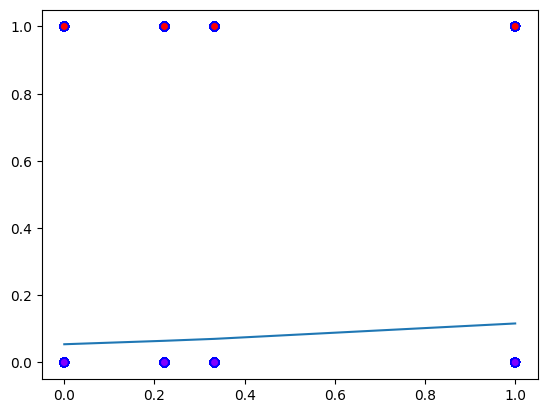

In [ ]:
# 4.4.5 Plot the probabilites

import matplotlib.pyplot as pltp

df_scaled_plot = pd.DataFrame({'x': X_test_scaled[:,0], 'y': y_test})
df_scaled_plot = df_scaled_plot.sort_values(by='x')


from scipy.special import expit

sigmoid_function = expit(df_scaled_plot['x'] * lr_scaled.coef_[0][0] + lr_scaled.intercept_[0]).ravel()
pltp.plot(df_scaled_plot['x'], sigmoid_function)
pltp.scatter(df_scaled_plot['x'], df_scaled_plot['y'], c=df_scaled_plot['y'], cmap='rainbow', edgecolors='b')

pandas.core.series.Series

In [ ]:
for_heatmap = pd.concat([X_train_scaled, y_train.astype()], axis = 1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

<Axes: >

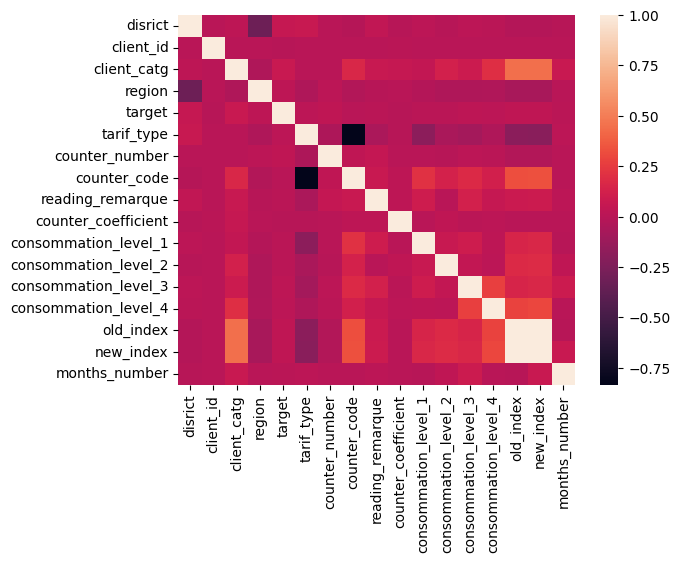

In [ ]:
# 4.5 Create a correlation heatmap with only the scaled data

# concat the X_train_scaled with the y_train

sns.heatmap(dfw.drop(['creation_date','invoice_date','counter_statue', 'counter_type'], axis = 1).corr())

In [ ]:
# 4.5.1 Try to train the model only with the features that seem to have an effect: disrict, client_catg, region and also take in the months_numer

In [ ]:
# 4.5.2 Define features (X) and target (y)

X_subset = dfw[['disrict','client_catg','region', 'months_number']]
y_subset = dfw['target']

In [ ]:
# 4.5.2 Data Split

X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, random_state = 42)

In [ ]:
# 4.5.3 Normalize the data 

scaler = MinMaxScaler()
X_train_subset_scaled = scaler.fit_transform(X_train_subset)
X_test_subset_scaled = scaler.transform(X_test_subset)

In [ ]:
# 4.5.4 Create Logistic regression model with the subset scaled data

lr_subset_scaled = LogisticRegression()
lr_subset_scaled = lr_subset_scaled.fit(X_train_subset_scaled, y_train_subset)

In [ ]:
# 4.5.5 Predict the target with the subset scaled data

y_pred_subset_scaled = lr_subset_scaled.predict(X_test_subset_scaled)

In [51]:
# 4.5.6 Create confusion matrix with the subset scaled data (This is still really bad, same values as the unscaled data)
confusion_matrix(y_test_subset, y_pred_subset_scaled)

array([[1030879,       0],
       [  88309,       0]])

In [ ]:
# 4.6 The dataset is very imbalanced. The Target 0 values are reduced to create a more balanced dataset to create the model

In [ ]:
# 4.6.1 Create subset of dataframe

# 1. You want to either choose all rows with taget = 1 and then concat to certain number of rows with target 0
# 2. Or choose rows with target = 1 OR rows with target = 0 until number (counted up with each row) = X

In [106]:
X_target_1 = dfw.loc[dfw['target'] == 1]

In [107]:
X_target_1.shape

(4476749, 21)

In [104]:
X_target_0 = dfw.loc[dfw['target'] == 0]

In [105]:
X_target_0.shape

(4123637, 21)

In [ ]:
# Create dummy variables for the categorical features 'client_id','creation_date', 'invoice_date', 'counter_statue', 'counter_type'

client_id = pd.get_dummies(dfw['client_id'])
creation_date = pd.get_dummies(dfw['creation_date'],drop_first=True)
invoice_date = pd.get_dummies(dfw['invoice_date'],drop_first=True)
counter_statue = pd.get_dummies(dfw['counter_statue'],drop_first=True)
counter_type = pd.get_dummies(dfw['counter_type'],drop_first=True)

dfw.drop(['client_id','creation_date', 'invoice_date', 'counter_statue', 'counter_type'])

df_wdummies = pd.concat([client_id, creation_date, invoice_date, counter_statue, counter_type])

: 

: 

In [ ]:
counter_type_new = pd.get_dummies(dfw['counter_type'], dtype='int')

In [ ]:
counter_type_new

,ELEC,GAZ
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
4476744,True,False
4476745,True,False
4476746,True,False
4476747,True,False


In [ ]:
pd.concat()
#.resetindex during concat

5 Implementing the new cleaning steps



In [ ]:
# 5.1 we check the values for certain columns and decide wether we transform them to categorical or not.
i_train.tarif_type= i_train.tarif_type.astype('category')
i_train.counter_type = i_train.counter_type.astype('category')
i_train.counter_code = i_train.counter_code.astype('category')
i_train.reading_remarque = i_train.reading_remarque.astype('category')

# some columns can be reduced to int8, to save memory.
i_train.counter_coefficient = i_train.counter_coefficient.astype('int8')
i_train.months_number = i_train.months_number.astype('int16')

i_train.consommation_level_4 = i_train.consommation_level_4.astype('int32')
i_train.consommation_level_3 = i_train.consommation_level_3.astype('int32')
i_train.consommation_level_2 = i_train.consommation_level_2.astype('int32')
i_train.consommation_level_1 = i_train.consommation_level_1.astype('int32')

# i_train.counter_statue.value_counts()
i_train.counter_statue = i_train.counter_statue.astype('category')

6 Create dummy variables and retrain the model (with scaled data)



In [ ]:
client_id_dummy = pd.get_dummies(dfw['client_id'])
creation_date_dummy = pd.DataFrame(pd.get_dummies(dfw['creation_date']), columns = dfw.columns)
invoice_date_dummy = pd.get_dummies(dfw['invoice_date'],drop_first=True)
counter_statue_dummy = pd.get_dummies(dfw['counter_statue'],drop_first=True)
counter_type_dummy = pd.get_dummies(dfw['counter_type'],drop_first=True)

dfw.drop(['client_id','creation_date', 'invoice_date', 'counter_statue', 'counter_type'])

df_wdummies = pd.concat([client_id_dummy, creation_date_dummy, invoice_date_dummy, counter_statue_dummy, counter_type_dummy])

In [ ]:
counter_statue_dummy= pd.DataFrame(pd.get_dummies(dfw['counter_statue'],dtype='int'), columns='counter_statue')
counter_type_new = pd.get_dummies(dfw['counter_type'], dtype='int')


TypeError: Index(...) must be called with a collection of some kind, 'counter_statue' was passed

In [ ]:
counter_statue_dummy

,0,1,2,3,4,5,46,420,618,769,269375,0,1,4,5,A
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4476745,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4476746,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4476747,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


7 Create a figure to describe the loss of potential fraud cases

In [7]:
# Ticket: Estimate how much money can be saved:

# What are the fraud cases in the dataset?

X_target_1 = dfw.loc[dfw['target'] == 1]
X_target_1.shape

(353112, 21)

In [9]:
X_target_1.head(20)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1384,63,100032,11,308,2012-11-07,1.0,2017-02-24,11,393848,0,...,9,1,781,0,0,0,3844,4625,8,ELEC
1385,63,100032,11,308,2012-11-07,1.0,2016-06-21,11,393848,0,...,9,1,382,0,0,0,3462,3844,4,ELEC
1386,63,100032,11,308,2012-11-07,1.0,2018-10-26,11,393848,0,...,9,1,373,0,0,0,6032,6405,4,ELEC
1387,63,100032,11,308,2012-11-07,1.0,2018-06-21,11,393848,0,...,9,1,328,0,0,0,5704,6032,4,ELEC
1388,63,100032,11,308,2012-11-07,1.0,2018-02-23,11,393848,0,...,9,1,703,0,0,0,5001,5704,4,ELEC
1389,63,100032,11,308,2012-11-07,1.0,2017-10-26,11,393848,0,...,6,1,0,0,0,0,5001,5001,4,ELEC
1390,63,100032,11,308,2012-11-07,1.0,2017-06-21,11,393848,0,...,9,1,376,0,0,0,4625,5001,4,ELEC
1391,63,100032,11,308,2012-11-07,1.0,2014-04-11,11,393848,0,...,9,1,418,0,0,0,1579,1997,4,ELEC
1392,63,100032,11,308,2012-11-07,1.0,2013-04-03,11,393848,1,...,9,1,303,0,0,0,0,303,4,ELEC
1393,63,100032,11,308,2012-11-07,1.0,2013-10-30,11,393848,1,...,9,1,403,0,0,0,596,999,4,ELEC


In [11]:
#Figuring out the costs of the fraud cases for the whole dataset

#Take only the fraud cases

dfw_fraud = dfw.loc[dfw['target'] == 1]
dfw_fraud.shape

(353112, 21)

In [12]:
dfw_fraud.head(5)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1384,63,100032,11,308,2012-11-07,1.0,2017-02-24,11,393848,0,...,9,1,781,0,0,0,3844,4625,8,ELEC
1385,63,100032,11,308,2012-11-07,1.0,2016-06-21,11,393848,0,...,9,1,382,0,0,0,3462,3844,4,ELEC
1386,63,100032,11,308,2012-11-07,1.0,2018-10-26,11,393848,0,...,9,1,373,0,0,0,6032,6405,4,ELEC
1387,63,100032,11,308,2012-11-07,1.0,2018-06-21,11,393848,0,...,9,1,328,0,0,0,5704,6032,4,ELEC
1388,63,100032,11,308,2012-11-07,1.0,2018-02-23,11,393848,0,...,9,1,703,0,0,0,5001,5704,4,ELEC


In [13]:
# Take only the electricity cases

dfw_fraud_ELEC = dfw_fraud.loc[dfw_fraud['counter_type'] == 'ELEC']
dfw_fraud_ELEC.shape

(236348, 21)

In [18]:
dfw_fraud_ELEC

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,sum_of_consommation_levels
1384,63,100032,11,308,2012-11-07,1.0,2017-02-24,11,393848,0,...,1,781,0,0,0,3844,4625,8,ELEC,781
1385,63,100032,11,308,2012-11-07,1.0,2016-06-21,11,393848,0,...,1,382,0,0,0,3462,3844,4,ELEC,382
1386,63,100032,11,308,2012-11-07,1.0,2018-10-26,11,393848,0,...,1,373,0,0,0,6032,6405,4,ELEC,373
1387,63,100032,11,308,2012-11-07,1.0,2018-06-21,11,393848,0,...,1,328,0,0,0,5704,6032,4,ELEC,328
1388,63,100032,11,308,2012-11-07,1.0,2018-02-23,11,393848,0,...,1,703,0,0,0,5001,5704,4,ELEC,703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476230,63,99982,11,379,1995-11-21,1.0,2010-11-22,10,1379797,0,...,1,200,192,0,0,17559,17951,4,ELEC,392
4476231,63,99982,11,379,1995-11-21,1.0,2011-07-19,10,1379797,0,...,1,200,98,0,0,18271,18569,4,ELEC,298
4476232,63,99982,11,379,1995-11-21,1.0,2012-03-19,10,1379797,0,...,1,187,0,0,0,18933,19120,4,ELEC,187
4476233,63,99982,11,379,1995-11-21,1.0,2013-03-21,10,1379797,0,...,1,95,0,0,0,19582,19677,4,ELEC,95


In [22]:
dfw_fraud_ELEC['region'].unique()

array([308, 307, 107, 101, 312, 106, 306, 311, 302, 301, 310, 104, 303,
       371, 103, 305, 304, 105, 313, 372, 309, 379, 206, 399])

In [23]:
dfw['region'].unique()

array([101, 107, 301, 105, 303, 103, 309, 311, 304, 104, 312, 305, 306,
       308, 372, 307, 313, 310, 371, 302, 106, 379, 399, 206, 199])

In [15]:
# calculate the sum of all the consommation levels

dfw_fraud_ELEC['sum_of_consommation_levels'] = dfw_fraud_ELEC['consommation_level_1'] + dfw_fraud_ELEC['consommation_level_2'] + dfw_fraud_ELEC['consommation_level_3'] + dfw_fraud_ELEC['consommation_level_4'] 


In [17]:
# Sum the sum of all consommation levels for all fraud cases
dfw_fraud_ELEC['sum_of_consommation_levels'].sum()

214827263

There are 214827263 kwh from fraud cases. this translates to 45 Mio Tunisian Dinar (household) or 73 Mio Tunisian Dinar (Business). In US Dollars the losses are 14 Mio (household) or 23 Mio (Business).

In [35]:
#Create the figure for the losses
# Create labels
x_labels = "regular invoices (blue)        fradulent invoices (orange)"
y_labels = "Number of invoices [Mio.]"

In [28]:
import matplotlib.pyplot as pltp

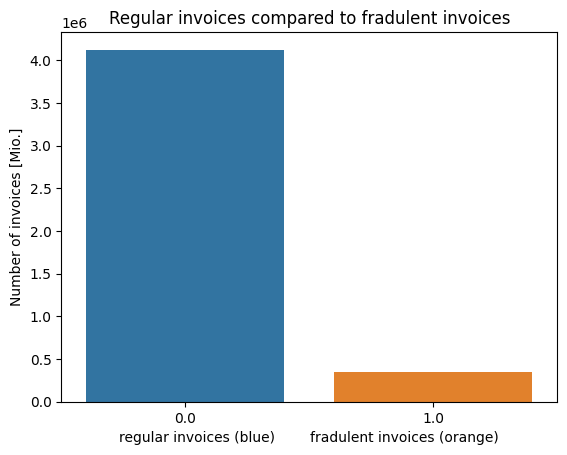

In [36]:
#Create the figure
ax = sns.countplot(data = dfw, x = 'target')
ax.set(xlabel = x_labels, ylabel = y_labels, title = 'Regular invoices compared to fradulent invoices')
pltp.show()

For anyone interested in a wafflechart:

https://github.com/simplesaad/WaffleChart/blob/master/Waffle%20Charts.ipynb

The normal waffle chart with ggplot2 apparently is not available within python (?)
The above notebook contains a long function that create a waffle chart with matplotlib.

In [ ]:
regression: dummys
trees: one hot encoder